<a href="https://colab.research.google.com/github/ImsuLongkumer/MachineLearning-models/blob/main/teaSickness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import tensorflow.keras as tfk
import tensorflow.keras.layers as tf1
import matplotlib.pyplot as plt
import numpy as np
import json
from zipfile import ZipFile

In [ ]:
kaggle_credentials = json.load(open('/content/kaggle (2).json'))

In [ ]:
!kaggle datasets download -d shashwatwork/identifying-disease-in-tea-leafs

Dataset URL: https://www.kaggle.com/datasets/shashwatwork/identifying-disease-in-tea-leafs
License(s): CC-BY-SA-4.0
100% 738M/740M [00:43<00:00, 20.2MB/s]
100% 740M/740M [00:43<00:00, 17.8MB/s]


In [ ]:
with ZipFile('/content/identifying-disease-in-tea-leafs.zip', 'r') as zipObj:
  zipObj.extractall()

In [ ]:
batch_size = 32
img_size = 256

In [ ]:
base_dir= '/content/tea sickness dataset'

In [ ]:
train_ds = tfk.utils.image_dataset_from_directory(
    base_dir,
    seed=10,
    validation_split=0.2,
    subset='training',
    image_size=(img_size, img_size),
    batch_size=batch_size
)

val_ds = tfk.utils.image_dataset_from_directory(
    base_dir,
    seed=10,
    validation_split=0.2,
    subset='validation',
    image_size=(img_size, img_size),
    batch_size=batch_size
)

Found 885 files belonging to 8 classes.
Using 708 files for training.
Found 885 files belonging to 8 classes.
Using 177 files for validation.


In [ ]:
class_names = train_ds.class_names

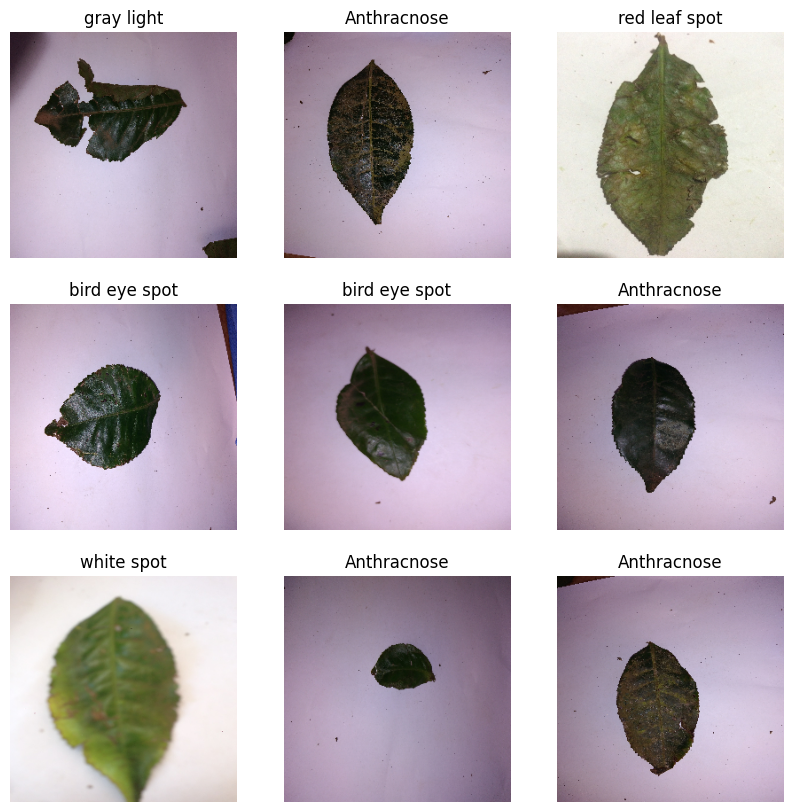

In [ ]:
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(class_names[labels[i]])
    plt.axis('off')

In [ ]:
def normalize_image(image, label):
  """Normalizes the image pixel values to the range [0, 1].

  Args:
    image: The image tensor.
    label: The corresponding label.

  Returns:
    A tuple containing the normalized image and label.
  """
  image = tf.cast(image, dtype=tf.float32) / 255.0
  return image, label

# Apply the normalization function to the datasets
train_ds = train_ds.map(normalize_image)
val_ds = val_ds.map(normalize_image)

In [ ]:
for image, label in train_ds.take(1):
  print(image, label)

In [ ]:
model = tfk.Sequential([
    tf1.Conv2D(32,3,padding='same'),
    tf1.BatchNormalization(),
    tf1.ReLU(),
    tf1.MaxPooling2D((2,2)),
    tf1.Conv2D(64,3,padding='same'),
    tf1.BatchNormalization(),
    tf1.ReLU(),
    tf1.MaxPooling2D((2,2)),
    tf1.Conv2D(128,3,padding='same'),
    tf1.BatchNormalization(),
    tf1.ReLU(),
    tf1.MaxPooling2D((2,2)),

    tf1.Flatten(),

    tf1.Dense(64),
    tf1.BatchNormalization(),
    tf1.ReLU(),
    tf1.Dropout(rate = 0.2, seed = 10),

    tf1.Dense(128),
    tf1.BatchNormalization(),
    tf1.ReLU(),
    tf1.Dropout(rate = 0.2, seed = 10),

    tf1.Dense(256),
    tf1.BatchNormalization(),
    tf1.ReLU(),
    tf1.Dropout(rate = 0.2, seed = 10),

    tf1.Dense(8, activation = 'softmax')
])

In [ ]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate = 0.001,
    decay_steps = 10000,
    decay_rate = 0.9)

model.compile(optimizer = tfk.optimizers.Adamax(learning_rate=lr_schedule),
              loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(train_ds, validation_data = val_ds, batch_size = 32,
                    epochs = 25)

Epoch 1/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.3160 - loss: 1.8494 - val_accuracy: 0.1977 - val_loss: 2.0346
Epoch 2/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.6405 - loss: 0.9763 - val_accuracy: 0.1808 - val_loss: 2.0297
Epoch 3/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.7098 - loss: 0.7860 - val_accuracy: 0.1808 - val_loss: 2.0517
Epoch 4/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 22s 950ms/step - accuracy: 0.7728 - loss: 0.6115 - val_accuracy: 0.1808 - val_loss: 2.1132
Epoch 5/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.7922 - loss: 0.5937 - val_accuracy: 0.1808 - val_loss: 2.1768
Epoch 6/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 38s 957ms/step - accuracy: 0.8170 - loss: 0.5072 - val_accuracy: 0.1808 - val_loss: 2.2709
Epoch 7/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.8307 - loss: 0.5077 - val_accuracy: 0.1808 - val_loss: 2.4368
Epoch 8/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.8787 - loss: 0.4267 - val_accuracy: 0.1808 - val

In [ ]:
model.save('tea_sickness_model.h5')